In [ ]:
# Data Analysis and Visualization / Análisis y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utils / Utilidades
import bootcampviztools as bvt
import toolbox_ML as tml

# Machine Learning / Aprendizaje automático
from sklearn.metrics import  mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Model Selection / Selección de modelos
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Micsellaneous / Misceláneos
import joblib
import datetime
import os

# Warning suppression / Suprimir advertencias
import warnings
warnings.filterwarnings("ignore")

# Load data / Cargar datos
df_vg = pd.read_csv("../data/vgchartz-2024.csv")

## Data visualization / Visualización de datos

In [2]:
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [3]:
# Se verifica la existencia y cantidad de valores nulos presentes en el Dataset / The existence and quantity of null values ​​present in the Dataset is verified.

df_vg.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [4]:
# Se verifica si en el Dataset existen duplicados / It is verified whether there are duplicates in the Dataset

df_vg.duplicated().sum()

0

In [5]:
# La columna "genre" la podria considerar categorica si se agrupan los valores con menos incidencias en una sola categoria, por lo que se decide no transformarla a categorica / 
# The "genre" column could be considered categorical if the values with fewer occurrences are grouped into a single category, so it is decided not to transform it into categorical

genre_counts = df_vg.genre.value_counts(dropna=False)

# Inicializar un diccionario vacío / Initialize an empty dictionary
diccionario = {}

# Iterar sobre la Series usando un bucle for / Iterate over the Series using a for loop
for indice, valor in genre_counts.items():
    diccionario[indice] = valor

diccionario

{'Misc': 9304,
 'Action': 8557,
 'Adventure': 6260,
 'Role-Playing': 5721,
 'Sports': 5586,
 'Shooter': 5410,
 'Platform': 4001,
 'Strategy': 3685,
 'Puzzle': 3521,
 'Racing': 3425,
 'Simulation': 3158,
 'Fighting': 2367,
 'Action-Adventure': 1877,
 'Visual Novel': 493,
 'Music': 297,
 'Party': 151,
 'MMO': 115,
 'Education': 35,
 'Board Game': 33,
 'Sandbox': 20}

| Nombre del campo                  | Descripción                                                                 | Tipo de variable      | Importancia Inicial | Notas                                                     |
|-----------------------------------|-----------------------------------------------------------------------------|-----------------------|---------------------|-----------------------------------------------------------|
| title                             | Título del videojuego                                                       | Numerica Continua     | 3                   | Identificador único para cada juego                     |
| console                           | Consola/plataforma a la que pertenece el videojuego                                    | Numerica Discreta     | 1                   | Relacionado con la plataforma del juego                |
| genre                             | Género del videojuego                                                       | Categorica            | 1                   | Clave para análisis de tipo de juego y preferencias     |
| publisher                         | Publicador del videojuego                                                   | Numerica Discreta     | 2                   | Puede indicar la  calidad de marketing   |
| developer                         | Desarrollador del videojuego                                                | Numerica Discreta     | 2                   | Clave para analizar la calidad de producción            |
| critic_score                      | Calificaciones de la critica por rango (Bajas : 0-5, Medias: 5-7, Altas: 7-10)            | Categórica            | 3                   | Clave para analizar si las ventas se ven influidas por la critica (Pero tiene demasiados valores nulos como para considerarla clave)    |
| total_sales                       | Ventas totales de copias del videojuego (millones)                                              | Numerica Discreta     | 0                   | Métrica clave para entender el éxito del juego         |
| na_sales                          | Ventas en América del Norte de copias del videojuego (millones)                                                | Numerica Discreta     | 1                   | Detalle regional para análisis de mercado                 |
| jp_sales                          | Ventas en Japón de copias del videojuego (millones)                                                            | Numerica Discreta     | 1                   | Detalle regional para análisis de mercado                 |
| pal_sales                         | Ventas en regiones PAL (Europa) de copias del videojuego (millones)                                                     | Numerica Discreta     | 1                   | Detalle regional para análisis de mercado                 |
| other_sales                       | Ventas en otras regiones del mundo de copias del videojuego (millones)                                          | Numerica Discreta     | 2                   | Métrica de ventas globales menos específicas          |
| release_date                      | Fecha de lanzamiento del videojuego                                         | Fecha / datetime      | 1                   | Influye en la antigüedad y del juego              |
| last_update                       | Última actualización del videojuego                                         | Fecha / datetime      | 3                   | Útil para análisis de soporte y actualizaciones           |
| console_company                   | Empresa que produce la consola (Sony, Microsoft, Nintendo, etc.)            | Categórica            | 1                   | Clave para analizar la competencia entre plataformas    |

## Featrure Engineering / Ingeniería de características

In [6]:
# Se transforman los valores de ambas columnas de fechas, a un datetime para su posterior análisis / The values of both date columns are transformed into a datetime for later analysis
df_vg["release_date"] = pd.to_datetime(df_vg["release_date"])
df_vg["last_update"] = pd.to_datetime(df_vg["last_update"])

In [7]:
# Normalizar la columna 'genre' (remover espacios y capitalizar)  / Normalize the 'genre' column (remove spaces and capitalize)   
df_vg['genre'] = df_vg['genre'].str.strip().str.capitalize()

# Asignar categorías a los géneros en la nueva columna 'genre' (reemplazar los géneros por categorías) / Assign categories to genres in the new 'genre' column (replace genres with categories)
df_vg.loc[df_vg['genre'].isin(['Action', 'Fighting', 'Action-adventure']), 'genre'] = 'Acción'
df_vg.loc[df_vg['genre'] == 'Adventure', 'genre'] = 'Aventura'
df_vg.loc[df_vg['genre'] == 'Shooter', 'genre'] = 'Shooter'
df_vg.loc[df_vg['genre'].isin(['Sports', 'Racing']), 'genre'] = 'Deportes y Carreras'
df_vg.loc[df_vg['genre'].isin(['Strategy', 'Simulation', 'Puzzle']), 'genre'] = 'Estrategia y Simulación'
df_vg.loc[df_vg['genre'].isin(['Platform', 'Music', 'Party']), 'genre'] = 'Plataformas y Música'
df_vg.loc[df_vg['genre'].isin(['Role-playing', 'Mmo', 'Visual novel','Sandbox']), 'genre'] = 'RPG y MMO'
df_vg.loc[df_vg['genre'].isin(['Education', 'Board game','Misc']), 'genre'] = 'Misceláneos/Varios'

# Calcular el conteo de géneros agrupados antes de reemplazar los valores / Calculate the count of grouped genres before replacing the values
genre_counts = df_vg['genre'].value_counts()

genre_counts

genre
Acción                     12801
Estrategia y Simulación    10364
Misceláneos/Varios          9372
Deportes y Carreras         9011
RPG y MMO                   6349
Aventura                    6260
Shooter                     5410
Plataformas y Música        4449
Name: count, dtype: int64

In [8]:
df_vg.console.unique()

array(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS',
       'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64',
       'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC',
       'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX',
       'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux',
       'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue',
       'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5',
       'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi',
       'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16'], dtype=object)

In [9]:
# Crear el diccionario de consolas agrupadas por compañía / Create the dictionary of consoles grouped by company
company = {
    "Sony": ["PS3", "PS4", "PS2", "PS5", "PSP", "PS", "PSN", "PSV"],
    "Microsoft": ["X360", "XOne", "XS", "XB", "XBL"],
    "PC": ["PC"],
    "Nintendo": ["Wii", "DS", "GBA", "N64", "GBC", "GC", "3DS", "GB", "WiiU", "SNES", "NES", "NS"],
    "Sega": ["DC", "SAT", "GG", "MSD", "MS", "GEN", "SCD"],
    "Atari": ["2600", "7800"],
    "Móviles": ["iOS", "ApII","And"]
}

# Crear una nueva columna 'console_company' en el DataFrame con todos sus valores como "Otros" / Create a new column 'console_company' in the DataFrame with all its values as "Otros"
df_vg["console_company"] = "Otros"

# Usar un bucle para asignar la compañía correcta a cada consola en la nueva columna / Use a loop to assign the correct company to each console in the new column
for company_name, consoles in company.items():
    df_vg.loc[df_vg["console"].isin(consoles), "console_company"] = company_name

df_vg.drop(columns=["console"], inplace=True)

# Verificar el conteo de las compañías de consolas / Check the count of console companies
df_vg["console_company"].value_counts()

console_company
Sony         16619
Nintendo     15694
PC           12617
Microsoft     7420
Otros         6783
Sega          3111
Móviles       1212
Atari          560
Name: count, dtype: int64

In [10]:
# Diccionario con expresiones regulares a reemplazar y sus equivalencias  / Dictionary with regular expressions to replace and their equivalents
# Se utiliza un diccionario para almacenar las expresiones regulares y sus reemplazos / A dictionary is used to store the regular expressions and their replacements
dict_replace = {
    r'^EA Sports.*': 'Electronic Arts',
    r'^Namco.*|^Bandai.*': 'Namco Bandai Games',
    r'^Microsoft Studios': 'Microsoft Game Studios',
    r'^Warner Bros\. Interactive$': 'Warner Bros. Interactive Entertainment',
    r'^2K Sports$': '2K Games',
    r'^Konami$': 'Konami Digital Entertainment',
    r'^PopCap$': 'PopCap Games'
}

# Reemplazar usando un bucle sobre el diccionario / Replace using a loop over the dictionary
# Se itera sobre el diccionario de reemplazos y se aplica la función str.replace() a las columnas 'publisher' y 'developer' /
# It iterates over the replacement dictionary and applies the str.replace() function to the 'publisher' and 'developer' columns
for pattern, replace in dict_replace.items():
    df_vg['publisher'] = df_vg['publisher'].str.replace(pattern, replace, regex=True)
    df_vg['developer'] = df_vg['developer'].str.replace(pattern, replace, regex=True)

In [11]:
# Se muestran las ventas totales por 'publisher' antes de agrupar utilizando expresiones regulares.
df_vg.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)

publisher
Electronic Arts                           1157.30
Activision                                 722.77
Ubisoft                                    462.57
THQ                                        320.89
Sony Computer Entertainment                311.08
Konami Digital Entertainment               241.30
Rockstar Games                             239.67
Namco Bandai Games                         237.46
Sega                                       206.38
Warner Bros. Interactive Entertainment     181.58
Name: total_sales, dtype: float64

In [12]:
# Se transforman los valores de ambas columnas de fechas, a un datetime
df_vg["release_date"] = pd.to_datetime(df_vg["release_date"])
df_vg["last_update"] = pd.to_datetime(df_vg["last_update"])

In [13]:
# Se eliminan las columnas que no se utilizarán en el análisis / The columns that will not be used in the analysis are removed
df_vg = df_vg.drop(columns=["img", "title"])

## Train - Test Split

In [14]:
target = "total_sales"

In [15]:
train_set, test_set = train_test_split(df_vg, test_size=0.2, random_state=42)

## Tratamiento de nulos / Null treatment

In [16]:
train_set['developer'].isna().sum(), train_set['publisher'].isna().sum()

(11, 0)

In [17]:
# Rellenar valores nulos de 'developer' con los de 'publisher' / Fill null values in 'developer' with those in 'publisher'
train_set['developer'] = train_set['developer'].str.strip()
test_set['developer'] = test_set['developer'].str.strip()

train_set['developer'] = train_set['developer'].fillna(train_set['publisher'])
test_set['developer'] = test_set['developer'].fillna(test_set['publisher'])

# Verificar la cantidad de valores nulos por columna / Check the number of null values ​​per column
train_set.isna().sum()

genre                  0
publisher              0
developer              0
critic_score       45894
total_sales        36053
na_sales           41091
jp_sales           45813
pal_sales          40966
other_sales        39086
release_date        5602
last_update        36895
console_company        0
dtype: int64

In [18]:
# Rellenar los valores de 'developer' con los de 'publisher' donde 'developer' sea 'Unknown' / Fill the values of 'developer' with those of 'publisher' where 'developer' is 'Unknown'
train_set.loc[train_set['developer'] == 'Unknown', 'developer'] = train_set['publisher']
test_set.loc[test_set['developer'] == 'Unknown', 'developer'] = test_set ['publisher']

train_set['developer'].value_counts()

developer
Namco Bandai Games              1256
Konami Digital Entertainment     840
Sega                             796
Capcom                           752
Unknown                          714
                                ... 
Playhouse Disney                   1
Transgaming Technologies           1
GMX Media                          1
lbxgames                           1
Nintendo / Bandai                  1
Name: count, Length: 8291, dtype: int64

In [19]:
# Se agrupan las columnas de ventas en una variable para su posterior análisis / The sales columns are grouped into a variable for later analysis
sales_col = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# Se rellenan los valores nulos con 0, asumiendo que los videojuegos con valores nulos puede ser por 2 posibles causas 
# 1) La empresa que los publicó, no da los datos de ventas de su videojuego - 2) que dicho videojuego no se comercializó en ese continente /
# The null values ​​are filled with 0, assuming that the video games with null values ​​may be due to 2 possible causes:
# 1) The company that published them does not provide sales data for its video game - 2) that said video game was not marketed in that continent

train_set[sales_col] = train_set[sales_col].fillna(0)
test_set[sales_col] = test_set[sales_col].fillna(0)

train_set.isna().sum()

genre                  0
publisher              0
developer              0
critic_score       45894
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date        5602
last_update        36895
console_company        0
dtype: int64

In [20]:
# Se multiplica por 1000000 los valores de las columnas de ventas para facilitar su posterior análisis (Su escala original) / 
# The values ​​of the sales columns are multiplied by 1000000 to facilitate their later analysis (Their original scale)
train_set[sales_col] = train_set[sales_col] * 1000000
test_set[sales_col] = test_set[sales_col] * 1000000

In [21]:
# Se rellenan los valores nulos de 'release_date' con los de 'last_update' / Fill null values in 'release_date' with those in 'last_update'
last_to_rele_train = train_set['release_date'].isna() & train_set['last_update'].notna()
last_to_rele_test = test_set['release_date'].isna() & test_set['last_update'].notna()

# Se rellenan los valores nulos de 'release_date' con los de 'last_update' / Fill null values in 'release_date' with those in 'last_update'
train_set.loc[last_to_rele_train, 'release_date'] = train_set.loc[last_to_rele_train, 'release_date'].fillna(train_set['last_update'])
test_set.loc[last_to_rele_test, 'release_date'] = test_set.loc[last_to_rele_test, 'release_date'].fillna(test_set['last_update'])

train_set.isna().sum()

genre                  0
publisher              0
developer              0
critic_score       45894
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date        1402
last_update        36895
console_company        0
dtype: int64

In [22]:
# Se reemplazan los valores nulos en la columna 'release_date', donde el valor no sea nulo en la columna 'last_update' / Replace null values in the 'release_date' column, where the value is not null in the 'last_update' column
rele_to_last_train = train_set['release_date'].notna() & train_set['last_update'].isna()
rele_to_last_test = test_set['release_date'].notna() & test_set['last_update'].isna()

# Se eliminan las filas donde 'release_date' y 'last_update' son nulos / Rows where 'release_date' and 'last_update' are null are removed
train_set.loc[rele_to_last_train, 'last_update'] = train_set.loc[rele_to_last_train, 'release_date']
test_set.loc[rele_to_last_test, 'last_update'] = test_set.loc[rele_to_last_test, 'release_date']

train_set.isna().sum()

genre                  0
publisher              0
developer              0
critic_score       45894
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date        1402
last_update         1402
console_company        0
dtype: int64

In [23]:
# Al haber disminuido el numero de valores nulos en estas columnas, se procede a eliminar las filas con estos valores.
train_set = train_set.dropna(subset=['release_date', 'last_update'])
test_set = test_set.dropna(subset=['release_date', 'last_update'])

train_set.isna().sum()

genre                  0
publisher              0
developer              0
critic_score       44510
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date           0
last_update            0
console_company        0
dtype: int64

In [24]:
# Filtra las filas donde la fecha sea posterior o igual a 1990 / Filter rows where the date is greater than or equal to 1990
train_set = train_set[train_set['release_date'] >= '1990-01-01']
test_set = test_set[test_set['release_date'] >= '1990-01-01']

# Verifica si las filas fueron eliminadas
print(train_set['release_date'].min())

# Esto lo hago porque quiero trabajar unicamente desde el año en el que salió la consola SNES (Super Nintendo) 1990

1990-01-01 00:00:00


In [25]:
train_set.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
genre,48224,8,Acción,9454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publisher,48224,3041,Unknown,5586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
developer,48224,7884,Namco Bandai Games,1185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
critic_score,5296.0,NaN,NaN,NaN,7.207761,1.0,6.4,7.5,8.3,10.0,1.460664
total_sales,48224.0,NaN,NaN,NaN,108258.543464,0.0,0.0,0.0,20000.0,20320000.0,483846.189004
na_sales,48224.0,NaN,NaN,NaN,54472.461845,0.0,0.0,0.0,0.0,9070000.0,251290.676538
jp_sales,48224.0,NaN,NaN,NaN,11271.773391,0.0,0.0,0.0,0.0,2130000.0,62848.50613
pal_sales,48224.0,NaN,NaN,NaN,31727.563039,0.0,0.0,0.0,0.0,9850000.0,193246.668976
other_sales,48224.0,NaN,NaN,NaN,10720.180823,0.0,0.0,0.0,0.0,3120000.0,65006.111243
release_date,48224,NaN,NaN,NaN,2008-11-21 03:27:33.682813696,1990-01-01 00:00:00,2003-01-01 00:00:00,2009-09-07 00:00:00,2014-11-18 00:00:00,2024-12-31 00:00:00,NaN


In [26]:
# Se crea una lista con las columnas de ventas / A list is created with the sales columns
sales_columns = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# Eliminar las filas donde todas las columnas de ventas sean 0.00 / Remove rows where all sales columns are 0.00
train_set = train_set[(train_set[sales_columns] != 0).any(axis=1)]
test_set = test_set[(test_set[sales_columns] != 0).any(axis=1)]

# Verificar el resultado de la eliminación / Check the result of the deletion
train_set.shape, test_set.shape

((13904, 12), (3454, 12))

In [27]:
# Se eliminan los duplicados en el conjunto de entrenamiento y prueba / Remove duplicates in the training and test set
train_set.drop_duplicates(keep="first", inplace=True)
test_set.drop_duplicates(keep="first", inplace=True)

# Se verifica si en el Dataset existen duplicados / It is verified whether there are duplicates in the Dataset
train_set.duplicated().sum()

0

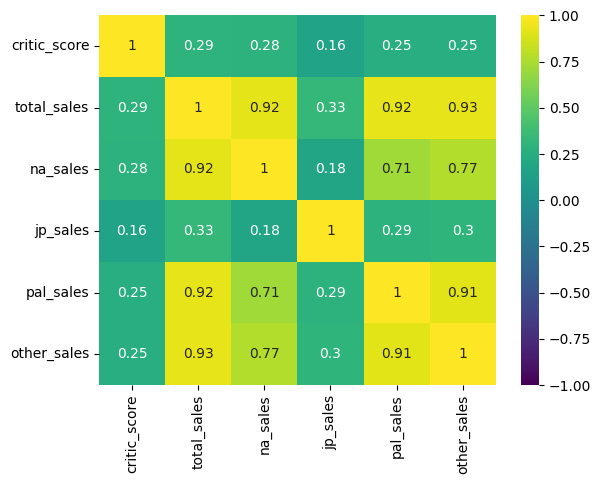

In [28]:
temp = train_set[train_set['critic_score'].notna()]

# Se hace un mapa de calor (heatmap) para determinar la relacion de critic_score con las columnas de ventas
sns.heatmap(temp[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr(), 
            vmin = -1, vmax =1, cmap = 'viridis', annot = True);

# En general el critic_score, tiene baja relación con las ventas, por lo que, para el análisis de mercado no me es util (posiblemente debido al alto porcentaje de nulos que tiene)

In [29]:
train_set['critic_score'].notna().sum()

3186

In [30]:
tml.describe_df(train_set)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,genre,object,0.000000,8,0.057670
1,publisher,object,0.000000,602,4.339677
2,developer,object,0.000000,2414,17.401961
3,critic_score,float64,77.032872,84,0.605536
4,total_sales,float64,0.000000,443,3.193483
5,na_sales,float64,0.000000,301,2.169839
6,jp_sales,float64,0.000000,113,0.814591
7,pal_sales,float64,0.000000,237,1.708478
8,other_sales,float64,0.000000,120,0.865052
9,release_date,datetime64[ns],0.000000,3613,26.045271


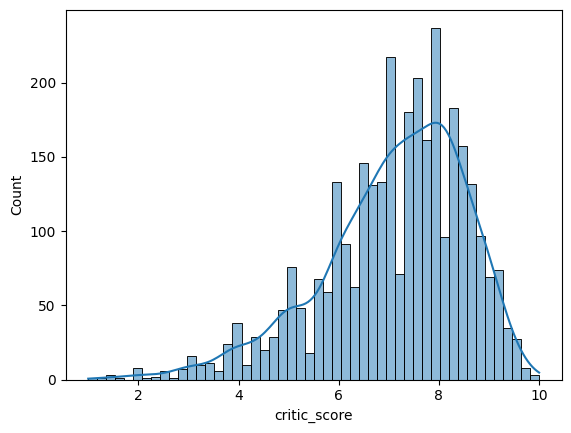

In [31]:
sns.histplot(data=train_set['critic_score'],
             bins=50,
             kde=True);

In [32]:
# Crear una columna que clasifique las calificaciones en rangos (bajas, medias, altas)
bins = [0, 5, 7, 10]
labels = ['Low', 'Medium', 'High']
train_set['critic_score'] = pd.cut(train_set['critic_score'], bins=bins, labels=labels, right=False)
test_set['critic_score'] = pd.cut(test_set['critic_score'], bins=bins, labels=labels, right=False)

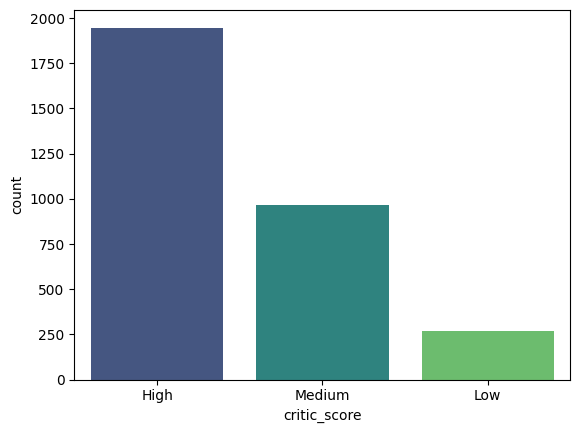

In [33]:
sns.countplot(data=train_set, 
              x='critic_score', 
              order=train_set['critic_score'].value_counts().index,
              palette='viridis');

In [34]:
train_set['critic_score'] = train_set['critic_score'].astype('object')
test_set['critic_score'] = test_set['critic_score'].astype('object')

In [35]:
train_set['critic_score'].fillna("Unknown", inplace=True)
test_set['critic_score'].fillna("Unknown", inplace=True)

critic_score
Unknown    77.054498
High       14.035467
Medium      6.956459
Low         1.953576
Name: proportion, dtype: float64

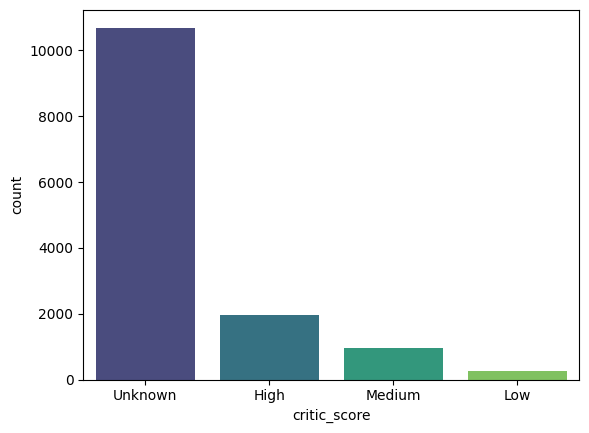

In [36]:
sns.countplot(data=train_set, 
              x='critic_score', 
              order=train_set['critic_score'].value_counts().index,
              palette='viridis');

train_set['critic_score'].value_counts(normalize=True) * 100

## Transformación de features / Feature transformation

In [37]:
# Convertir las columnas de ventas a enteros sin decimales para evitar posibles errores
train_set[sales_columns] = train_set[sales_columns].astype(float)
test_set[sales_columns] = test_set[sales_columns].astype(float)

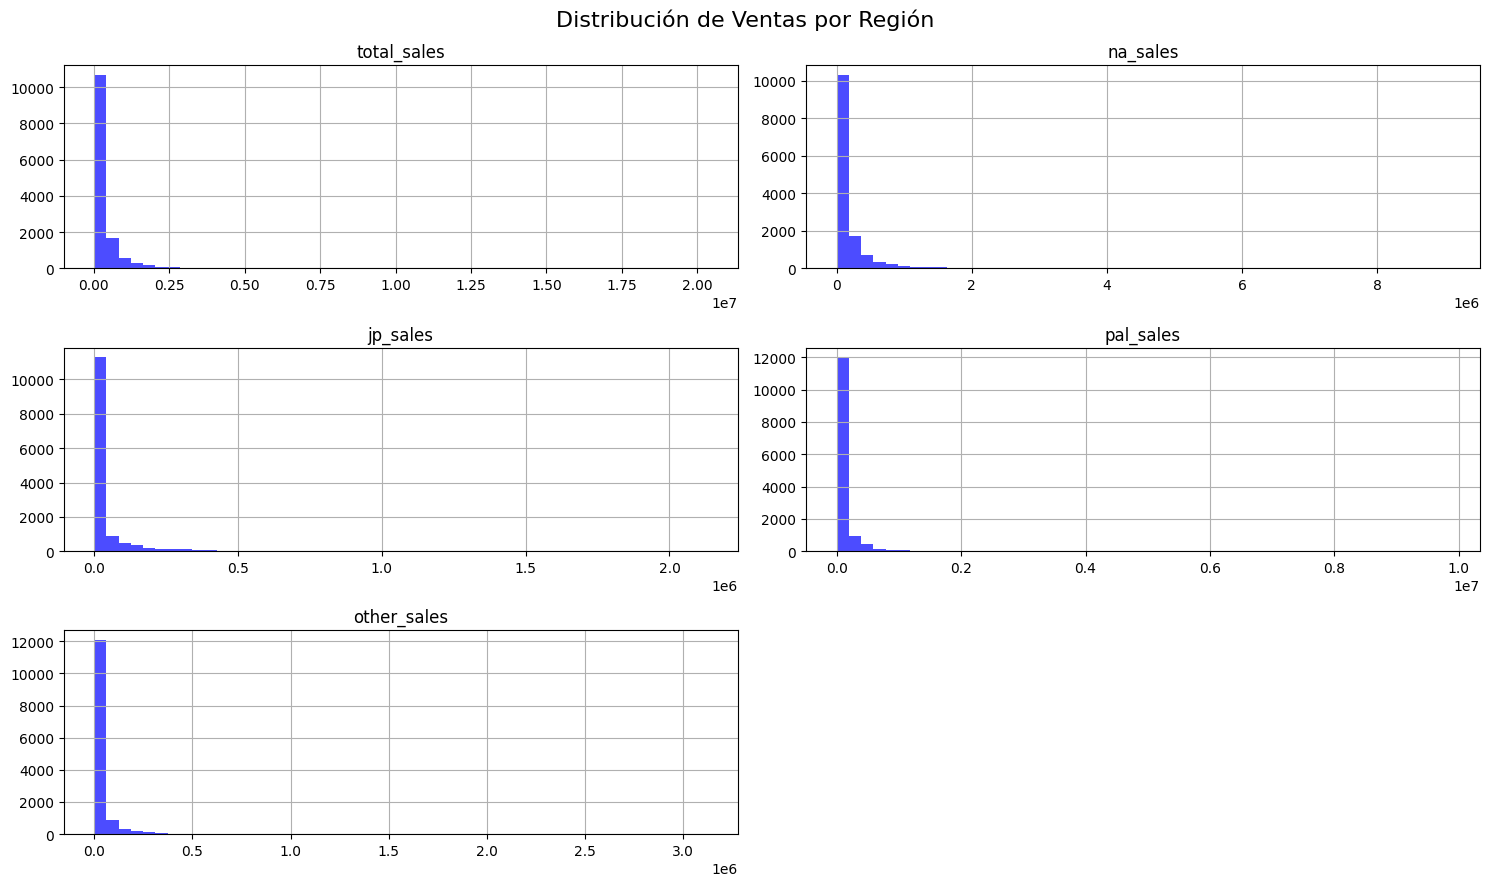

In [38]:
train_set[sales_columns].hist(figsize=(15, 9), bins=50, layout=(3, 2), color='blue', alpha=0.7)
plt.suptitle('Distribución de Ventas por Región', fontsize=16)
plt.tight_layout()
plt.show()

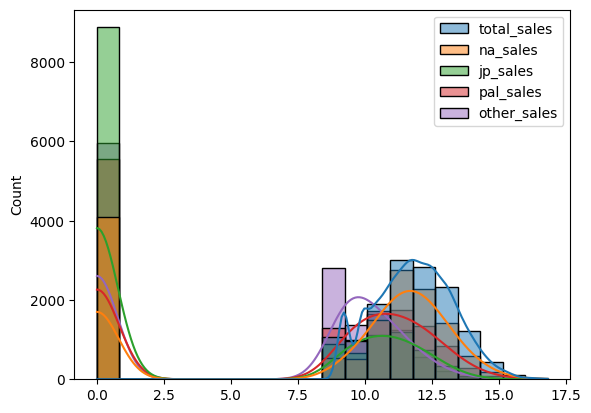

In [39]:
train_set[sales_col] = np.log1p(train_set[sales_col])
test_set[sales_col] = np.log1p(test_set[sales_col])

sns.histplot(data = train_set[sales_col],
             bins=20,
             kde=True);

In [40]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13872 entries, 4420 to 15795
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   genre            13872 non-null  object        
 1   publisher        13872 non-null  object        
 2   developer        13872 non-null  object        
 3   critic_score     13872 non-null  object        
 4   total_sales      13872 non-null  float64       
 5   na_sales         13872 non-null  float64       
 6   jp_sales         13872 non-null  float64       
 7   pal_sales        13872 non-null  float64       
 8   other_sales      13872 non-null  float64       
 9   release_date     13872 non-null  datetime64[ns]
 10  last_update      13872 non-null  datetime64[ns]
 11  console_company  13872 non-null  object        
dtypes: datetime64[ns](2), float64(5), object(5)
memory usage: 1.4+ MB


In [41]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

train_set["publisher"].value_counts()

publisher
Electronic Arts                           1103
Namco Bandai Games                         831
Activision                                 788
Ubisoft                                    754
Konami Digital Entertainment               698
THQ                                        567
Sega                                       486
Sony Computer Entertainment                436
Capcom                                     354
Nintendo                                   280
Warner Bros. Interactive Entertainment     233
2K Games                                   232
Atari                                      206
Midway Games                               199
Atlus                                      175
Square Enix                                161
Majesco                                    160
Acclaim Entertainment                      158
Disney Interactive Studios                 154
Tecmo Koei                                 151
Idea Factory                               137
D3 

In [42]:
# Se define un umbral de frecuencia para agrupar los publishers menos frecuentes / A frequency threshold is defined to group less frequent publishers
umbral = 50

# Calcular las frecuencias de los publishers / Calculate the frequencies of the publishers
freq = train_set["publisher"].value_counts()

# Se asigna el nombre del publisher si su frecuencia es mayor o igual al umbral, de lo contrario se asigna "Unknown" / The publisher name is assigned if its frequency is greater than or equal to the threshold, otherwise "Unknown" is assigned
train_set["publisher"] = train_set["publisher"].apply(lambda x: x if freq[x] >= umbral else "Unknown")
test_set["publisher"] = test_set["publisher"].apply(lambda x: x if freq.get(x, 0) >= umbral else "Unknown")

In [43]:
train_set["publisher"].value_counts()

publisher
Unknown                                   3691
Electronic Arts                           1103
Namco Bandai Games                         831
Activision                                 788
Ubisoft                                    754
Konami Digital Entertainment               698
THQ                                        567
Sega                                       486
Sony Computer Entertainment                436
Capcom                                     354
Nintendo                                   280
Warner Bros. Interactive Entertainment     233
2K Games                                   232
Atari                                      206
Midway Games                               199
Atlus                                      175
Square Enix                                161
Majesco                                    160
Acclaim Entertainment                      158
Disney Interactive Studios                 154
Tecmo Koei                                 151
Ide

In [44]:
train_set["publisher"].nunique()

45

In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

train_set["developer"].value_counts()

developer
Namco Bandai Games                                                      476
Konami Digital Entertainment                                            340
Capcom                                                                  250
EA Canada                                                               232
Ubisoft                                                                 157
EA Tiburon                                                              153
Ubisoft Montreal                                                        133
Sega                                                                    127
Idea Factory                                                            109
Omega Force                                                             108
Traveller's Tales                                                       107
Visual Concepts                                                         107
Electronic Arts                                                          86
Hu

In [46]:
# Se define un umbral de frecuencia para agrupar los publishers menos frecuentes / A frequency threshold is defined to group less frequent publishers
umbral = 30

# Calcular las frecuencias de los publishers / Calculate the frequencies of the publishers
freq = train_set["developer"].value_counts()

# Se asigna el nombre del publisher si su frecuencia es mayor o igual al umbral, de lo contrario se asigna "Unknown" / The publisher name is assigned if its frequency is greater than or equal to the threshold, otherwise "Unknown" is assigned
train_set["developer"] = train_set["developer"].apply(lambda x: x if freq[x] >= umbral else "Unknown")
test_set["developer"] = test_set["developer"].apply(lambda x: x if freq.get(x, 0) >= umbral else "Unknown")

In [47]:
train_set["developer"].value_counts()

developer
Unknown                                9066
Namco Bandai Games                      476
Konami Digital Entertainment            340
Capcom                                  250
EA Canada                               232
Ubisoft                                 157
EA Tiburon                              153
Ubisoft Montreal                        133
Sega                                    127
Idea Factory                            109
Omega Force                             108
Traveller's Tales                       107
Visual Concepts                         107
Electronic Arts                          86
Hudson Soft                              81
Activision                               75
Square Enix                              75
Vicarious Visions                        73
THQ                                      72
Codemasters                              69
Nippon Ichi Software                     65
Koei                                     63
Arc System Works      

In [48]:
train_set["developer"].nunique()

68

In [49]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13872 entries, 4420 to 15795
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   genre            13872 non-null  object        
 1   publisher        13872 non-null  object        
 2   developer        13872 non-null  object        
 3   critic_score     13872 non-null  object        
 4   total_sales      13872 non-null  float64       
 5   na_sales         13872 non-null  float64       
 6   jp_sales         13872 non-null  float64       
 7   pal_sales        13872 non-null  float64       
 8   other_sales      13872 non-null  float64       
 9   release_date     13872 non-null  datetime64[ns]
 10  last_update      13872 non-null  datetime64[ns]
 11  console_company  13872 non-null  object        
dtypes: datetime64[ns](2), float64(5), object(5)
memory usage: 1.4+ MB


In [50]:
tml.describe_df(train_set)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,genre,object,0.0,8,0.057670
1,publisher,object,0.0,45,0.324394
2,developer,object,0.0,68,0.490196
3,critic_score,object,0.0,4,0.028835
4,total_sales,float64,0.0,443,3.193483
5,na_sales,float64,0.0,301,2.169839
6,jp_sales,float64,0.0,113,0.814591
7,pal_sales,float64,0.0,237,1.708478
8,other_sales,float64,0.0,120,0.865052
9,release_date,datetime64[ns],0.0,3613,26.045271


In [51]:
# One-hot encoding de las variables categóricas / One-hot encoding of categorical variables
# Convertir las variables categóricas a variables dummy (one-hot encoding) / Convert categorical variables to dummy variables (one-hot encoding)
# Se eliminan las columnas que no se utilizarán en el análisis / The columns that will not be used in the analysis are removed

train_set = pd.get_dummies(train_set, columns=["genre", "critic_score", "console_company"], drop_first=True)
test_set = pd.get_dummies(test_set, columns=["genre", "critic_score", "console_company"], drop_first=True)

In [52]:
tml.describe_df(train_set)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,publisher,object,0.0,45,0.324394
1,developer,object,0.0,68,0.490196
2,total_sales,float64,0.0,443,3.193483
3,na_sales,float64,0.0,301,2.169839
4,jp_sales,float64,0.0,113,0.814591
5,pal_sales,float64,0.0,237,1.708478
6,other_sales,float64,0.0,120,0.865052
7,release_date,datetime64[ns],0.0,3613,26.045271
8,last_update,datetime64[ns],0.0,3390,24.437716
9,genre_Aventura,bool,0.0,2,0.014418


In [53]:
# Se utiliza value_counts() para contar la cantidad de veces que aparece cada editor en la columna 'publisher' del conjunto de entrenamiento / 
# The value_counts() function is used to count the number of times each publisher appears in the 'publisher' column of the training set
publisher_counts = train_set['publisher'].value_counts()

# Reemplazamos cada valor de 'publisher' en el conjunto de entrenamiento y testeo por su frecuencia y lo convertimos a float / 
# We replace each value of 'publisher' in the training and test set by its frequency and convert it to float
train_set['publisher'] = train_set['publisher'].map(publisher_counts).astype(float)
test_set['publisher'] = test_set['publisher'].map(publisher_counts).astype(float)

# Se utiliza value_counts() para contar la cantidad de veces que aparece cada desarrollador en la columna 'developer' del conjunto de entrenamiento /
# The value_counts() function is used to count the number of times each developer appears in the 'developer' column of the training set
publisher_counts = train_set['developer'].value_counts()

# Reemplazamos cada valor de 'developer' en el conjunto de entrenamiento y testeo por su frecuencia y lo convertimos a float /
# We replace each value of 'developer' in the training and test set by its frequency and convert it to float
train_set['developer'] = train_set['developer'].map(publisher_counts).astype(float)
test_set['developer'] = test_set['developer'].map(publisher_counts).astype(float)

In [54]:
tml.describe_df(train_set)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,publisher,float64,0.0,42,0.302768
1,developer,float64,0.0,43,0.309977
2,total_sales,float64,0.0,443,3.193483
3,na_sales,float64,0.0,301,2.169839
4,jp_sales,float64,0.0,113,0.814591
5,pal_sales,float64,0.0,237,1.708478
6,other_sales,float64,0.0,120,0.865052
7,release_date,datetime64[ns],0.0,3613,26.045271
8,last_update,datetime64[ns],0.0,3390,24.437716
9,genre_Aventura,bool,0.0,2,0.014418


In [55]:
train_set.drop(columns=["last_update"], inplace=True)
test_set.drop(columns=["last_update"], inplace=True)

In [56]:
# Se extraen los componentes de la fecha de lanzamiento en el conjunto de entrenamiento y testeo / Extract the components of the release date in the training and test set
train_set['release_year'] = train_set['release_date'].dt.year.astype('int64')
train_set['release_month'] = train_set['release_date'].dt.month.astype('int64')
train_set['release_day'] = train_set['release_date'].dt.day.astype('int64')
train_set['release_weekday'] = train_set['release_date'].dt.weekday.astype('int64')

test_set['release_year'] = test_set['release_date'].dt.year.astype('int64')
test_set['release_month'] = test_set['release_date'].dt.month.astype('int64')
test_set['release_day'] = test_set['release_date'].dt.day.astype('int64')
test_set['release_weekday'] = test_set['release_date'].dt.weekday.astype('int64')

# Se eliminan las columnas de fecha de lanzamiento / Remove the release date columns
train_set.drop(columns=["release_date"], inplace=True)
test_set.drop(columns=["release_date"], inplace=True)

In [57]:
tml.describe_df(train_set)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,publisher,float64,0.0,42,0.302768
1,developer,float64,0.0,43,0.309977
2,total_sales,float64,0.0,443,3.193483
3,na_sales,float64,0.0,301,2.169839
4,jp_sales,float64,0.0,113,0.814591
5,pal_sales,float64,0.0,237,1.708478
6,other_sales,float64,0.0,120,0.865052
7,genre_Aventura,bool,0.0,2,0.014418
8,genre_Deportes y Carreras,bool,0.0,2,0.014418
9,genre_Estrategia y Simulación,bool,0.0,2,0.014418


In [58]:
features_num = ["publisher", "developer", "release_year", "release_month", "release_day", "release_weekday",
                 "na_sales", "jp_sales", "pal_sales", "other_sales"]

In [59]:
X_train = train_set.drop(columns=[target])
y_train = train_set[target]

X_test = test_set.drop(columns=[target])
y_test = test_set[target]

In [60]:
# Asegurarse de que X_test tenga las mismas columnas que X_train
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0  # Asignamos 0 a las columnas faltantes en el conjunto de prueba

# Alinear las columnas de X_test con X_train
X_test = X_test[X_train.columns]

In [61]:
# Normalizar los datos / Normalize the data

X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()

scaler = StandardScaler()
X_train_standardized[features_num] = scaler.fit_transform(X_train[features_num])
X_test_standardized[features_num] = scaler.transform(X_test[features_num])

X_train_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
publisher,13872.0,8.400303e-17,1.000036,-0.900221,-0.774579,-0.412232,1.626493,1.626493
developer,13872.0,1.792748e-17,1.000036,-1.401063,-1.371140,0.727952,0.727952,0.727952
na_sales,13872.0,-8.144197e-17,1.000036,-1.517475,-1.517475,0.505112,0.717014,1.427669
jp_sales,13872.0,-1.034672e-16,1.000036,-0.743072,-0.743072,-0.743072,1.138370,2.025200
pal_sales,13872.0,-8.938128e-17,1.000036,-1.202523,-1.202523,0.583952,0.855262,1.702255
other_sales,13872.0,-1.175530e-16,1.000036,-1.139397,-1.139397,0.646213,0.859186,1.759578
release_year,13872.0,7.862479e-15,1.000036,-3.128560,-0.677419,0.022908,0.548152,2.123886
release_month,13872.0,1.352244e-16,1.000036,-1.889874,-1.000180,0.186080,0.779210,1.372339
release_day,13872.0,-1.311267e-16,1.000036,-1.759594,-0.875775,0.118521,0.891863,1.554727
release_weekday,13872.0,1.434198e-17,1.000036,-1.306717,-0.627964,-0.627964,0.729542,2.765801


## Baseline

In [62]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42, max_iter=10000),
    "Lasso Regression": Lasso(random_state=42, max_iter=10000),
    "ElasticNet": ElasticNet(random_state=42, max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(max_depth=15, random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(max_depth=15, random_state=42, n_jobs=-1, tree_method='hist'),
}

In [63]:
# Diccionario para almacenar los resultados / Dictionary to store the results
results = {}

# Se entrena cada modelo y se evalúa con RMSE / Each model is trained and evaluated with RMSE
for nombre, modelo in models.items():
    modelo.fit(X_train_standardized, np.exp(y_train))
    predicciones = modelo.predict(X_test_standardized)
    rmse = np.sqrt(mean_squared_error(y_test, predicciones))
    results[nombre] = rmse
    print(f'{nombre}: RMSE = {rmse:.4f}')

# Se crea un DataFrame para comparar los resultados / Create a DataFrame to compare the results
resultados_df = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE']).sort_values(by='RMSE')
resultados_df


Linear Regression: RMSE = 629462.2703
Ridge Regression: RMSE = 608721.1563
Lasso Regression: RMSE = 618298.9573
ElasticNet: RMSE = 491754.6133
Decision Tree: RMSE = 863018.5594
Random Forest: RMSE = 854986.6673
AdaBoost: RMSE = 1120112.2358
Gradient Boosting: RMSE = 860482.3091
Hist Gradient Boosting: RMSE = 877064.7509
XGBoost: RMSE = 857987.5788


,Model,RMSE
3,ElasticNet,4.917546e+05
1,Ridge Regression,6.087212e+05
2,Lasso Regression,6.182990e+05
0,Linear Regression,6.294623e+05
5,Random Forest,8.549867e+05
9,XGBoost,8.579876e+05
7,Gradient Boosting,8.604823e+05
4,Decision Tree,8.630186e+05
8,Hist Gradient Boosting,8.770648e+05
6,AdaBoost,1.120112e+06


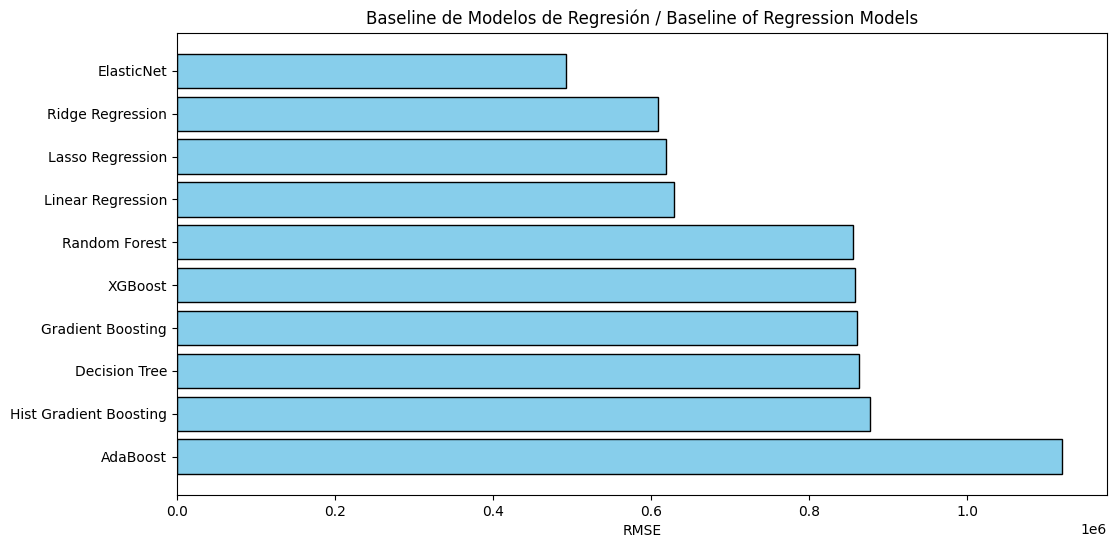

In [64]:
# Visualización de resultados / Visualization of results
plt.figure(figsize=(12, len(resultados_df) * 0.6))
plt.barh(resultados_df['Model'], resultados_df['RMSE'], color='skyblue', linewidth=1, edgecolor='black')
plt.xlabel('RMSE')
plt.title('Baseline de Modelos de Regresión / Baseline of Regression Models')
plt.gca().invert_yaxis()  # Para que el modelo con menor RMSE aparezca arriba / To have the model with the lowest RMSE appear at the top
plt.show()

## Optimización de hiperparámetros / Hyperparameter optimization

In [65]:
# Definición de grids de hiperparámetros
param_grids = {
    "Linear Regression": {},
    "Ridge Regression": {
        "alpha": np.logspace(-3, 3, 50)
    }, 
    "Lasso Regression": {
        "alpha": np.logspace(-3, 3, 50)
    },
    "ElasticNet": {
        "alpha": np.logspace(-3, 3, 50),
        "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    "Decision Tree": {
        "max_depth": [5, 10, 15, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": [None, "sqrt", "log2"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [10, 15, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["auto", "sqrt", "log2"],
        "bootstrap": [True, False]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5, 1],
        "loss": ["linear", "square", "exponential"]
    },
    "Gradient Boosting": {
        "n_estimators": [200, 300],
        "learning_rate": [0.1, 0.2],
        "max_depth": [3, 5],
        "subsample": [0.6, 0.8],
        "min_samples_split": [5, 10],
        "min_samples_leaf": [1, 2],
        "max_features": [None, "log2"],
    },
    "Hist Gradient Boosting": {
        "max_iter": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [5, 10],
        "max_leaf_nodes": [30, 50, 70],
        "l2_regularization": [0.0, 0.1, 0.5]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "gamma": [0, 0.1, 0.2]
    },
}

# Diccionarios para almacenar los resultados de GridSearchCV y los mejores parámetros / Dictionaries to store the results of GridSearchCV and the best parameters
results_best = {}
grid_results = {}

# Se entrena cada modelo con GridSearchCV y se evalúa con RMSE / Each model is trained with GridSearchCV and evaluated with RMSE
for nombre, modelo in models.items():
    print(f"Optimización de hiperparámetros para / Hyperparameter optimization for: {nombre}...")
    param_grid = param_grids.get(nombre, {})

    # Si no hay hiperparámetros a optimizar, se entrena el modelo directamente / If there are no hyperparameters to optimize, the model is trained directly
    if not param_grid:
        print(f"{nombre} No tiene hiperparámetros a optimizar / It has no hyperparameters to optimize.\n")
        modelo.fit(X_train_standardized, np.exp(y_train))
        predicciones = modelo.predict(X_test_standardized)
        rmse = np.sqrt(mean_squared_error(y_test, predicciones))
        results_best[nombre] = {"Best Params": None, "Best CV RMSE": rmse}
        continue
    
    grid = GridSearchCV(modelo, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train_standardized, np.exp(y_train))
    grid_results[nombre] = grid  # Guardamos el objeto GridSearchCV para acceder a los resultados más tarde / We save the GridSearchCV object to access the results later
    best_params = grid.best_params_
    best_rmse = np.sqrt(-grid.best_score_)
    
    results_best[nombre] = {"Best Params": best_params, "Best CV RMSE": best_rmse}
    print(f"{nombre}: Best Params: {best_params}, Best CV RMSE: {best_rmse:.4f}\n")

# Se convierte el diccionario de resultados a un DataFrame y se ordena por RMSE / The results dictionary is converted to a DataFrame and sorted by RMSE
results_best_df = pd.DataFrame(results_best).T.sort_values(by="Best CV RMSE")
print("Resultados de la optimización de hiperparámetros / Hyperparameter optimization results:")
results_best_df

Optimización de hiperparámetros para / Hyperparameter optimization for: Linear Regression...
Linear Regression No tiene hiperparámetros a optimizar / It has no hyperparameters to optimize.

Optimización de hiperparámetros para / Hyperparameter optimization for: Ridge Regression...
Ridge Regression: Best Params: {'alpha': 8.286427728546842}, Best CV RMSE: 696088.4451

Optimización de hiperparámetros para / Hyperparameter optimization for: Lasso Regression...
Lasso Regression: Best Params: {'alpha': 323.745754281764}, Best CV RMSE: 696068.4109

Optimización de hiperparámetros para / Hyperparameter optimization for: ElasticNet...
ElasticNet: Best Params: {'alpha': 0.0013257113655901094, 'l1_ratio': 0.5}, Best CV RMSE: 696088.3530

Optimización de hiperparámetros para / Hyperparameter optimization for: Decision Tree...
Decision Tree: Best Params: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}, Best CV RMSE: 109680.4890

Optimización de hiperparámetro

,Best Params,Best CV RMSE
Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'max_fe...",49187.752971
XGBoost,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",69552.216164
Random Forest,"{'bootstrap': False, 'max_depth': 15, 'max_fea...",104964.849749
Decision Tree,"{'max_depth': 20, 'max_features': None, 'min_s...",109680.489011
Hist Gradient Boosting,"{'l2_regularization': 0.0, 'learning_rate': 0....",137039.332016
AdaBoost,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",206571.384398
Linear Regression,NaN,629462.270274
Lasso Regression,{'alpha': 323.745754281764},696068.410914
ElasticNet,"{'alpha': 0.0013257113655901094, 'l1_ratio': 0.5}",696088.353043
Ridge Regression,{'alpha': 8.286427728546842},696088.4451


In [66]:
# Se selecciona el modelo con el menor RMSE en validación cruzada / The model with the lowest RMSE in cross-validation is selected
best_model_name = results_best_df.index[0]
if best_model_name in grid_results:
    best_model = grid_results[best_model_name].best_estimator_
else:
    # Si el mejor modelo no fue optimizado (por ejemplo, Linear Regression), se entrena directamente con los datos de entrenamiento
    # If the best model was not optimized (for example, Linear Regression), it is trained directly with the training data
    best_model = models[best_model_name]
    best_model.fit(X_train_standardized, np.exp(y_train))

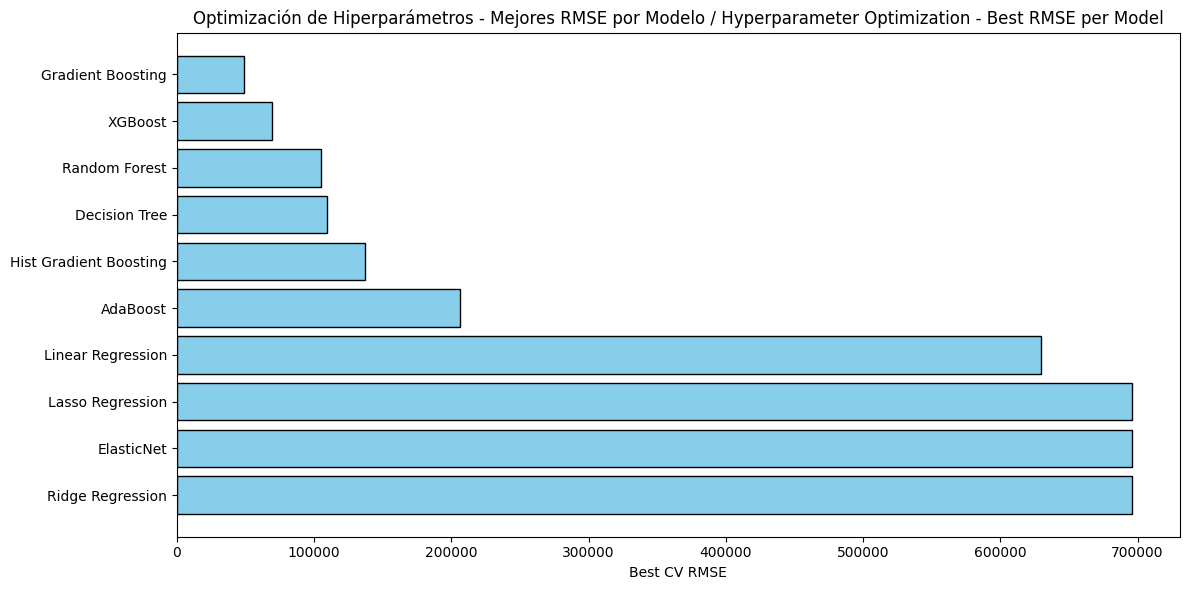

In [67]:
# Visualización de resultados / Visualization of results
plt.figure(figsize=(12, len(results_best_df) * 0.6))
plt.barh(results_best_df.index, results_best_df["Best CV RMSE"], color='skyblue', linewidth=1, edgecolor='black')
plt.xlabel('Best CV RMSE')
plt.title('Optimización de Hiperparámetros - Mejores RMSE por Modelo / Hyperparameter Optimization - Best RMSE per Model') 
plt.gca().invert_yaxis()  # Para que el modelo con menor RMSE aparezca arriba / To have the model with the lowest RMSE appear at the top
plt.tight_layout()
plt.show()

In [ ]:
# Definir la ruta de la carpeta donde se guardarán los modelos
model_dir = r"C:\Users\rafae\Documents\GitHub\Machine-Learning-Videogames\src\models"

# Definir el nombre completo del archivo que contendrá el modelo
model_filename = os.path.join(model_dir, f"best_model_{best_model_name}.pkl")

# Guardar el modelo usando joblib
joblib.dump(best_model, model_filename)
print(f"El mejor modelo ({best_model_name}) ha sido guardado en '{model_filename}'")

El mejor modelo (Gradient Boosting) ha sido guardado en 'best_model_Gradient Boosting.pkl'
